In [2]:
import pandas as pd
data = pd.read_csv("data/keystrokeo1_ext.csv")

Number of unique users:

In [3]:
len(data["user"].unique())

38

In [4]:
data.keys()

Index(['user', 'session', 'Unnamed: 2', 'duration', 'keyname', 'pause',
       'pause_ag', 'timepress', 'timerelease'],
      dtype='object')

## Plot pause distribution 

In [5]:
userid_1=11
userdata_1=data[data["user"]==userid_1]

userid_2=26
userdata_2=data[data["user"]==userid_2]

pause_types = {"writingr": "pause","ag": "pause_ag"}
pause_type = pause_types["ag"]


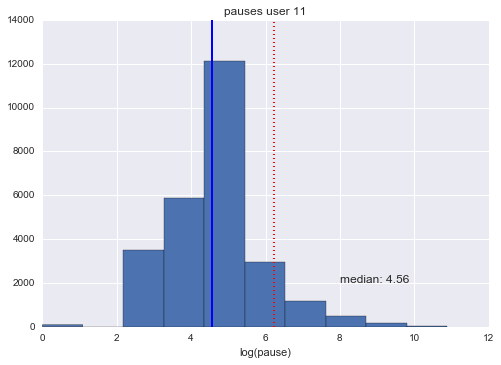

In [6]:
% matplotlib inline
import math
import seaborn as sns
import matplotlib.pyplot as plt

df_pauses_1 = pd.DataFrame({"pauses user {}".format(userid_1): [math.log(p) for p in userdata_1[pause_type] if p > 0]})
df_pauses_2 = pd.DataFrame({"pauses user {}".format(userid_2): [math.log(p) for p in userdata_2[pause_type] if p > 0]})

pdat_1=df_pauses_1["pauses user {}".format(userid_1)]
result_1 = plt.hist(pdat_1)
plt.axvline(pdat_1.median(), color='b', linestyle='solid', linewidth=2)
plt.axvline(math.log(500), color='r', linestyle='dotted', linewidth=2)
plt.text(8, 2000, 'median: {0:.2f}'.format(pdat_1.median())) 
plt.title("pauses user {}".format(userid_1))
plt.xlabel("log(pause)")

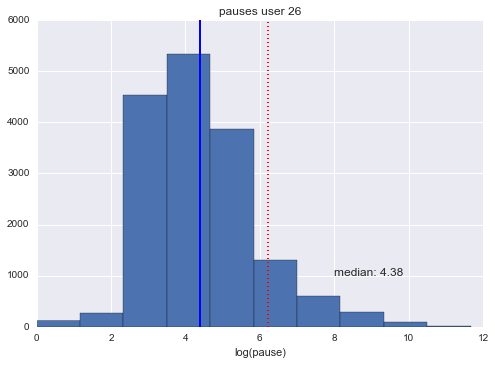

In [7]:
pdat_2=df_pauses_2["pauses user {}".format(userid_2)]
result_2 = plt.hist(pdat_2)
plt.axvline(pdat_2.median(), color='b', linestyle='solid', linewidth=2)
plt.axvline(math.log(500), color='r', linestyle='dotted', linewidth=2)
plt.text(8, 1000, 'median: {0:.2f}'.format(pdat_2.median())) 
plt.title("pauses user {}".format(userid_2))
plt.xlabel("log(pause)")

## Pause vs word len


In [9]:
from src.preprocess_steward import *
levels=["user","session"]
df = pd.read_csv("data/keystrokeo1_ext.csv", index_col=levels)

In [10]:
dfl = df.groupby(level=levels).apply(get_duration_between_words_type_ag)

In [11]:
dfl.head()

token_len  token_pauses       tokens type
user session                                             
2    1       0         11        -128.0  Sensitivity   ag
             1          8         208.0     analysis   ag
             2          2         128.0           is   ag
             3          1       73331.0            a   ag
             4          8          96.0     analysis   ag

In [12]:
dfl.loc[dfl['token_pauses'] < 0, 'token_pauses'] = 0
dfl.head()


token_len  token_pauses       tokens type
user session                                             
2    1       0         11           0.0  Sensitivity   ag
             1          8         208.0     analysis   ag
             2          2         128.0           is   ag
             3          1       73331.0            a   ag
             4          8          96.0     analysis   ag

In [317]:
from scipy.stats.stats import pearsonr
import math

(0.080811404684414445, 0.49979550377079218)

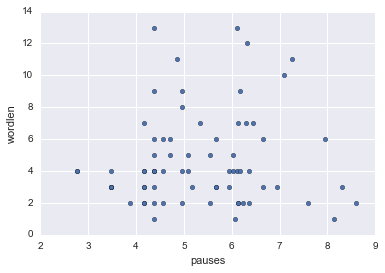

In [318]:

all_nozero = dfl[dfl["token_pauses"]>0]
log_pauses = [math.log(p) for p in all_nozero.iloc[(7,1)]['token_pauses']]
user7 = pd.DataFrame({"pauses": log_pauses, "wordlen": all_nozero.iloc[(7,1)]['token_len']})
user7.plot.scatter("pauses", "wordlen")
pearsonr(log_pauses, all_nozero.iloc[(7,1)]['token_len'])

(-0.12808921196623635, 0.17060124583656547)

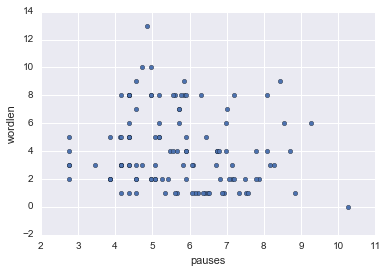

In [319]:
uid=3
log_pauses = [math.log(p) for p in all_nozero.iloc[(uid,1)]['token_pauses']]
user7 = pd.DataFrame({"pauses": log_pauses, "wordlen": all_nozero.iloc[(uid,1)]['token_len']})
user7.plot.scatter("pauses", "wordlen")
pearsonr(log_pauses, all_nozero.iloc[(uid,1)]['token_len'])

In [320]:
dfl[dfl["token_pauses"]>0]["token_pauses"].describe()

count     95548.000000
mean        825.471480
std        3923.845562
min           1.000000
25%          64.000000
50%         128.000000
75%         385.000000
max      241698.000000
Name: token_pauses, dtype: float64

In [321]:
#dfl_nozero_max10k = dfl[(dfl["token_pauses"]>0) & (dfl["token_pauses"]<10000)]
#allrm = pd.DataFrame({"pauses": dfl_nozero_max10k['token_pauses'], "wordlen": dfl_nozero_max10k['token_len']})
#allrm.plot.scatter("pauses", "wordlen")

## Wikitionary


In [322]:
lines = open("/Users/bplank/corpora/wiktionary/en.tags.li").readlines()
from collections import defaultdict
wik = defaultdict(set)
for line in lines:
    _,w,t,_ = line.split()
    wik[w].add(t)
print(wik['the'])

{'DET', 'ADV'}


In [227]:
#uid=1
#user1_pauses = [math.log(p) for p in all_nozero.iloc[(uid,1)]['token_pauses']]
#user1_tokens = all_nozero.iloc[(uid,1)]['tokens']
# take all!
user1_pauses = [math.log(p) for p in all_nozero['token_pauses']]
user1_tokens = all_nozero['tokens']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13a5c04e0>], dtype=object)

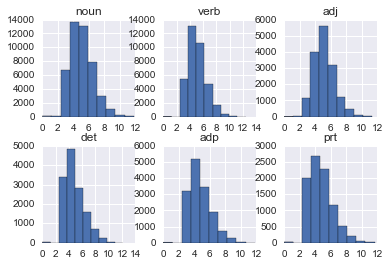

In [323]:
tokens_in_dict = []
det = []
noun = []
verb = []
prt = []
punct = []
num = []
adj = []
adp = []

det_len = []
noun_len = []
verb_len = []
prt_len = []
punct_len = []
num_len = []
adj_len = []
adp_len = []
for w,pause in zip(user1_tokens, user1_pauses):
    if w in wik:
        tokens_in_dict.append((w, wik[w], pause))
        #pause = math.log(pause)
        if "DET" in wik[w]:
            det.append(pause)
            det_len.append(len(w))
        if "NOUN" in wik[w]:
            noun.append(pause)
            noun_len.append(len(w))
        if "PRT" in wik[w]:
            prt.append(pause)
            prt_len.append(len(w))
        if "VERB" in wik[w]:
            verb.append(pause)
            verb_len.append(len(w))
        if "." in wik[w]:
            punct.append(pause)
            punct_len.append(len(w))
        if "NUM" in wik[w]:
            num.append(pause)
            num_len.append(len(w))
        if "ADJ" in wik[w]:
            adj.append(pause)
            adj_len.append(len(w))
        if "ADP" in wik[w]:
            adp.append(pause)
            adp_len.append(len(w))
pos_det = pd.DataFrame({"det": det}) 
pos_noun = pd.DataFrame({"noun": noun})
pos_verb = pd.DataFrame({"verb": verb})
pos_prt = pd.DataFrame({"prt": prt})
pos_punct = pd.DataFrame({"punct": punct})
pos_num = pd.DataFrame({"num": num})
pos_adj = pd.DataFrame({"adj": adj})
pos_adp = pd.DataFrame({"adp": adp})

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3)

pos_det.hist(ax=axes[1,0])
pos_noun.hist(ax=axes[0,0])
pos_prt.hist(ax=axes[1,2])
pos_verb.hist(ax=axes[0,1])
pos_adj.hist(ax=axes[0,2])
pos_adp.hist(ax=axes[1,1])

In [324]:
user_id = 5
tokens = []
pauses = []
for name, group in all_nozero.groupby(level="user"):
    if name == user_id:
        tokens = group["tokens"]
        pauses = [math.log(p) for p in group["token_pauses"]]
        break

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d399668>], dtype=object)

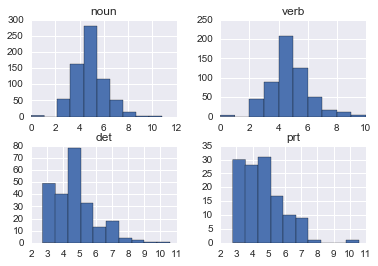

In [325]:
tokens_in_dict = []
det = []
noun = []
verb = []
prt = []
punct = []
num = []
adj = []

det_len = []
noun_len = []
verb_len = []
prt_len = []
punct_len = []
num_len = []
adj_len = []
for w,pause in zip(tokens, pauses):
    if w in wik:
        tokens_in_dict.append((w, wik[w], pause))
        #pause = math.log(pause)
        if "DET" in wik[w]:
            det.append(pause)
            det_len.append(len(w))
        if "NOUN" in wik[w]:
            noun.append(pause)
            noun_len.append(len(w))
        if "PRT" in wik[w]:
            prt.append(pause)
            prt_len.append(len(w))
        if "VERB" in wik[w]:
            verb.append(pause)
            verb_len.append(len(w))
        if "." in wik[w]:
            punct.append(pause)
            punct_len.append(len(w))
        if "NUM" in wik[w]:
            num.append(pause)
            num_len.append(len(w))
        if "ADJ" in wik[w]:
            adj.append(pause)
            adj_len.append(len(w))
pos_det = pd.DataFrame({"det": det}) 
pos_noun = pd.DataFrame({"noun": noun})
pos_verb = pd.DataFrame({"verb": verb})
pos_prt = pd.DataFrame({"prt": prt})
pos_punct = pd.DataFrame({"punct": punct})
pos_num = pd.DataFrame({"num": num})
pos_adj = pd.DataFrame({"adj": adj})
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2)
pos_det.hist(ax=axes[1,0])
pos_noun.hist(ax=axes[0,0])
pos_prt.hist(ax=axes[1,1])
pos_verb.hist(ax=axes[0,1])
#pos_adj.hist(ax=axes[0,2])
#pos_adp.hist(ax=axes[1,2])